Imports

In [21]:
#Imports
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model 

Carregar o dataset

In [2]:
#Carregar o dataset
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

Exploracao dos dados

In [3]:
#explorar os dados
'''imagens_treino.shape
len(identificacoes_treino)
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.max()
identificacoes_treino.min()'''

'imagens_treino.shape\nlen(identificacoes_treino)\nimagens_teste.shape\nlen(identificacoes_teste)\nidentificacoes_treino.max()\nidentificacoes_treino.min()'

Exibição dos dados

Text(0.5, 1.0, 'Bota')

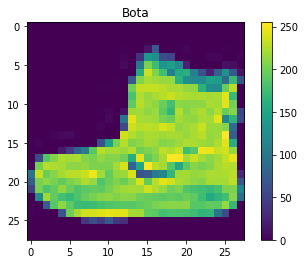

In [4]:
#exibir os dados
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
'''plt.title(identificacoes_treino[0])
print(nomes_de_classificacoes[9])
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[imagem])
'''
plt.imshow(imagens_treino[0])
plt.colorbar()
plt.title(nomes_de_classificacoes[9])

Criação do modelo de predição

In [14]:
imagens_treino = imagens_treino/255.0 #normalização de 0-255 para 0-1

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),        #trasnforma de 28x28 em 1x784
    keras.layers.Dense(256, activation = tf.nn.relu),    #conecta os layes Unidade Linear Retificada
    keras.layers.Dropout(0.2),
    #keras.layers.Dense(128, activation = tf.nn.relu),
    #keras.layers.Dense(64, activation = tf.nn.relu),    #increases the losses
    keras.layers.Dense(10, activation = tf.nn.softmax)   #defini as problabilidades das camadas anteriores e escolhe
])
  
modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

#historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split=0.2) #under fit
#historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 10, validation_split=0.2) #over fit
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 6, validation_split=0.2)

Epoch 1/6
1500/1500 [==============================] - 4s 3ms/step - loss: 1.0999 - accuracy: 0.6435 - val_loss: 0.7029 - val_accuracy: 0.7528
Epoch 2/6
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6612 - accuracy: 0.7609 - val_loss: 0.5906 - val_accuracy: 0.7862
Epoch 3/6
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5834 - accuracy: 0.7901 - val_loss: 0.5372 - val_accuracy: 0.8075
Epoch 4/6
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5386 - accuracy: 0.8068 - val_loss: 0.5051 - val_accuracy: 0.8200
Epoch 5/6
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5074 - accuracy: 0.8197 - val_loss: 0.4835 - val_accuracy: 0.8273
Epoch 6/6
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4862 - accuracy: 0.8278 - val_loss: 0.4661 - val_accuracy: 0.8307


Salvando e importando o modelo criado acima

In [22]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

PLOT do gráfico de Acurárica por epocas

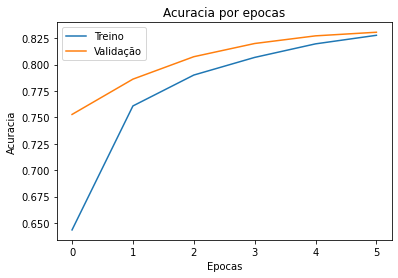

In [15]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acuracia por epocas')
plt.xlabel('Epocas')
plt.ylabel('Acuracia')
plt.legend(['Treino','Validação'])

Testando a predição do modelo

In [16]:
testes = modelo.predict(imagens_teste)
print('Resultado previsto: ', np.argmax(testes[1732]))
print('Resultado real: ',identificacoes_teste[1732])
testes = modelo.predict(imagens_teste)
print('Resultado previsto: ', np.argmax(testes[1722]))
print('Resultado real: ',identificacoes_teste[1722])

Resultado previsto:  4
Resultado real:  2
Resultado previsto:  7
Resultado real:  7


In [17]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda teste: ', perda_teste)
print('Acurarica teste; ', acuracia_teste*100)

313/313 [==============================] - 0s 2ms/step - loss: 18286.7637 - accuracy: 0.7149
Perda teste:  18286.763671875
Acurarica teste;  71.4900016784668


PLOT do gráfico de perdas por epocas

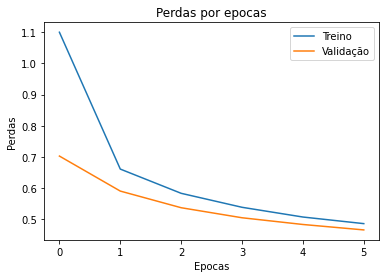

In [28]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por epocas')
plt.xlabel('Epocas')
plt.ylabel('Perdas')
plt.legend(['Treino','Validação'])

Testando a predição do modelo SALVO

In [27]:
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo: ', np.argmax(testes_modelo_salvo[1]))
print('Resultado real: ',identificacoes_teste[1732])

resultado teste modelo salvo:  2
Resultado real:  2
